In [3]:
# 資料加工、處理、分析函式庫
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 視覺化函式庫
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

# 機器學習函式庫
import sklearn

# 顯示到小數點後第3位
%precision 3

'%.3f'

##### Holdout法
    特徵工程、降低維度
    1. K分割交叉驗證(k-fold cross validation)
    2. 留一驗證(leave-one-out)
##### 交叉驗證法
    超參數調校

#### 10-2-1 Holdout法與交叉驗證法

k分割交叉驗證:
先將資料隨機分割為k個區塊，將k個當中的1個區塊做為驗證用，剩下的k-1個做為學習用資料來運用，反覆進行k個可能性，取得在各個可能性裡的模型評估值。

留一驗證:
與k分割交叉驗證作法一樣，只是將1個留作驗證資料，剩下的視為學習資料，反覆進行k種可能性，資料非常少時，可能使用這個手法

In [2]:
# 所需函式庫等的匯入
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 讀取乳癌資料
cancer = load_breast_cancer()

# 決策樹類別的初始化
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

# k分割交叉驗證的執行
scores = cross_val_score(tree, cancer.data, cancer.target, cv = 5)

# 結果的顯示
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.904 0.912 0.956 0.939 0.956]
Cross validation scores: 0.933+-0.022


In [9]:
from sklearn.linear_model import LogisticRegression

# 邏輯迴歸
Logregression = LogisticRegression(random_state = 0)

# k分割交叉驗證的執行
scores = cross_val_score(Logregression, cancer.data, cancer.target, cv = 5)

# 結果的顯示
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.939 0.939 0.956 0.912 0.956]
Cross validation scores: 0.940+-0.016


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

#### 10-2-2 性能調校:超參數的調校

 格點搜尋:對於數個超參數的所有組合進行交叉驗證，探索性能高的參數組合來進行最佳模型的學習。

最佳分數:0.91
此時的參數(gamma, C):(0.001, 1.0)


<AxesSubplot:>

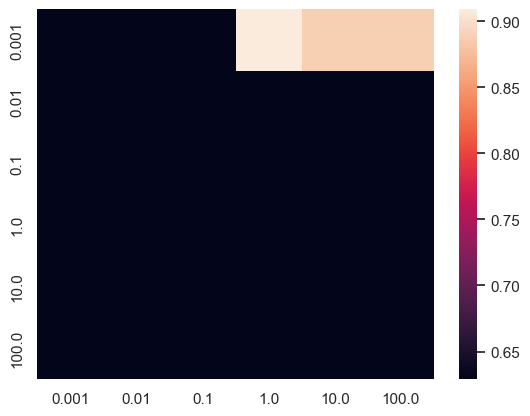

In [6]:
# 匯入
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 讀取乳癌資料
cancer = load_breast_cancer()

# 分為訓練資料與測試資料
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

# 以超參數的所有組合來建構並驗證模型
scores = {}
for gamma  in np.logspace(-3, 2, num = 6):
    for C in np.logspace(-3, 2, num = 6):
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)

# 將驗證結果存於scores
scores = pd.Series(scores)

# 顯示
print('最佳分數:{:.2f}'.format(scores.max()))
print('此時的參數(gamma, C):{}'.format(scores.idxmax()))

# 顯示熱圖。縱橫顯示gamma、橫軸顯示C
sns.heatmap(scores.unstack())

32768.000